<h1 style="text-align: center;"><strong>Tareas Cortas - Bloque 1</strong></h1>


<ul>
<li><strong>Curso:</strong> CE5201: Procesamiento y An&aacute;lisis de Im&aacute;genes Digitales</li>
<li><strong>Estudiante:</strong> Luis Felipe Vargas Jimenez</li>
<li><strong>Carnet:</strong> 2020211831<br /><br /></li>

</ul>

<p><strong>Pregunta 2:</strong> Enunciado...</p>

In [37]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


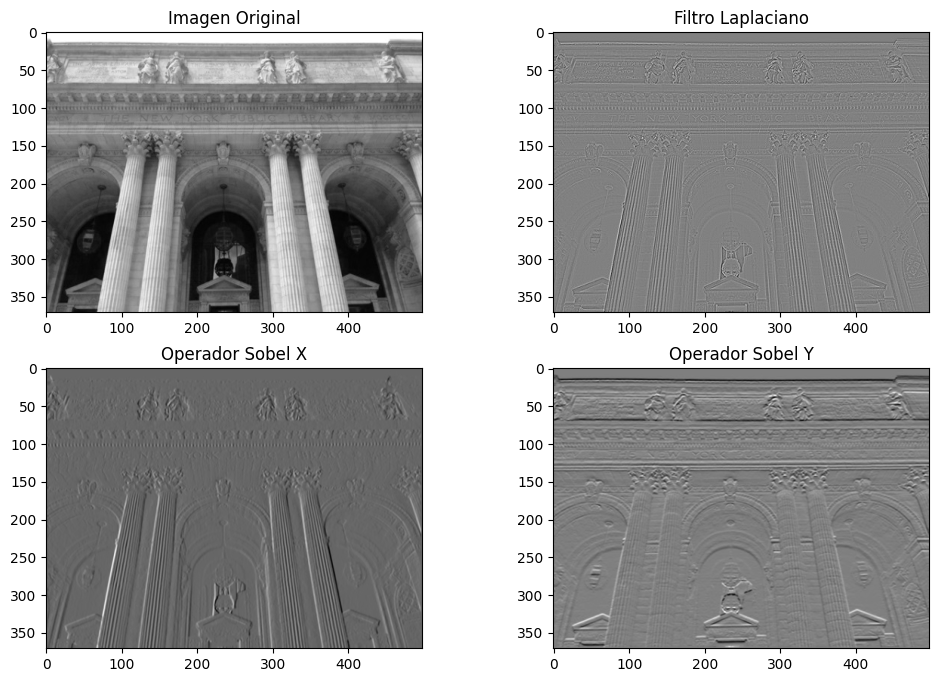

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer la imagen en escala de grises
img = cv2.imread('columnas.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar el filtro Laplaciano
laplacian = cv2.Laplacian(img, cv2.CV_64F)

# Aplicar el operador de Sobel en la dirección X y Y
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)  # Sobel X
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)  # Sobel Y

# Mostrar las imágenes
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.title('Imagen Original')
plt.imshow(img, cmap='gray')

plt.subplot(2, 2, 2)
plt.title('Filtro Laplaciano')
plt.imshow(laplacian, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Operador Sobel X')
plt.imshow(sobelx, cmap='gray')

plt.subplot(2, 2, 4)
plt.title('Operador Sobel Y')
plt.imshow(sobely, cmap='gray')

plt.show()


<p><strong>Pregunta 3:</strong> Enunciado...</p>

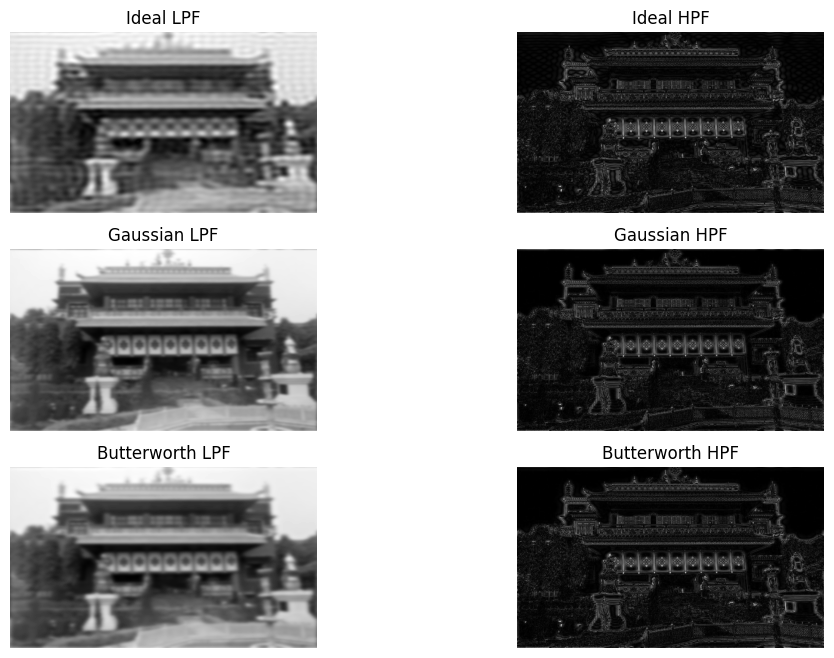

In [39]:


# Funciones para crear filtros en el dominio de la frecuencia
def ideal_low_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) <= cutoff:
                mask[i, j] = 1
    return mask

def ideal_high_pass_filter(shape, cutoff):
    return 1 - ideal_low_pass_filter(shape, cutoff)

def gaussian_low_pass_filter(shape, sigma):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = np.exp(-(d**2) / (2 * (sigma**2)))
    return mask

def gaussian_high_pass_filter(shape, sigma):
    return 1 - gaussian_low_pass_filter(shape, sigma)

def butterworth_low_pass_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.float32)
    for i in range(rows):
        for j in range(cols):
            d = np.sqrt((i - crow)**2 + (j - ccol)**2)
            mask[i, j] = 1 / (1 + (d / cutoff)**(2 * order))
    return mask

def butterworth_high_pass_filter(shape, cutoff, order):
    return 1 - butterworth_low_pass_filter(shape, cutoff, order)

# Aplicar filtro en el dominio de la frecuencia
def apply_frequency_filter(image, filter_mask):
    dft = np.fft.fft2(image)
    dft_shift = np.fft.fftshift(dft)
    filtered_dft = dft_shift * filter_mask
    idft_shift = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(idft_shift)
    return np.abs(filtered_image)

# Leer la imagen
img = cv2.imread('edificio.jpg', cv2.IMREAD_GRAYSCALE)

# Aplicar los filtros
cutoff = 30  # Valor arbitrario para el corte
order = 2    # Orden del filtro Butterworth

# Crear máscaras para los filtros
ideal_lp = ideal_low_pass_filter(img.shape, cutoff)
ideal_hp = ideal_high_pass_filter(img.shape, cutoff)
gaussian_lp = gaussian_low_pass_filter(img.shape, cutoff)
gaussian_hp = gaussian_high_pass_filter(img.shape, cutoff)
butterworth_lp = butterworth_low_pass_filter(img.shape, cutoff, order)
butterworth_hp = butterworth_high_pass_filter(img.shape, cutoff, order)

# Aplicar filtros a la imagen
filtered_ideal_lp = apply_frequency_filter(img, ideal_lp)
filtered_ideal_hp = apply_frequency_filter(img, ideal_hp)
filtered_gaussian_lp = apply_frequency_filter(img, gaussian_lp)
filtered_gaussian_hp = apply_frequency_filter(img, gaussian_hp)
filtered_butterworth_lp = apply_frequency_filter(img, butterworth_lp)
filtered_butterworth_hp = apply_frequency_filter(img, butterworth_hp)

# Mostrar los resultados
plt.figure(figsize=(12, 8))

plt.subplot(3, 2, 1)
plt.title('Ideal LPF')
plt.imshow(filtered_ideal_lp, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.title('Ideal HPF')
plt.imshow(filtered_ideal_hp, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 3)
plt.title('Gaussian LPF')
plt.imshow(filtered_gaussian_lp, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.title('Gaussian HPF')
plt.imshow(filtered_gaussian_hp, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 5)
plt.title('Butterworth LPF')
plt.imshow(filtered_butterworth_lp, cmap='gray')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.title('Butterworth HPF')
plt.imshow(filtered_butterworth_hp, cmap='gray')
plt.axis('off')

plt.show()


<p><strong>Pregunta 4:</strong> Enunciado...</p>

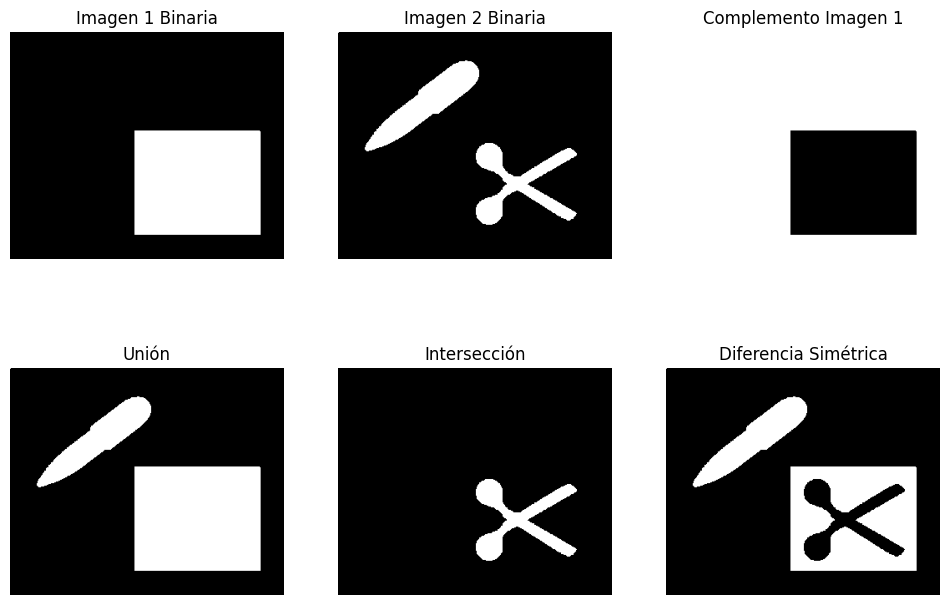

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Leer y convertir las imágenes a binario
img1 = cv2.imread('imagen2.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('imagen3.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_img1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
_, binary_img2 = cv2.threshold(img2, 127, 255, cv2.THRESH_BINARY)

# Operaciones morfológicas
complemento_img1 = cv2.bitwise_not(binary_img1)
union = cv2.bitwise_or(binary_img1, binary_img2)
interseccion = cv2.bitwise_and(binary_img1, binary_img2)
diferencia_simetrica = cv2.bitwise_xor(binary_img1, binary_img2)

# Mostrar los resultados
imagenes = [binary_img1, binary_img2, complemento_img1, union, interseccion, diferencia_simetrica]
titulos = ['Imagen 1 Binaria', 'Imagen 2 Binaria', 'Complemento Imagen 1', 'Unión', 'Intersección', 'Diferencia Simétrica']

plt.figure(figsize=(12, 8))
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.title(titulos[i])
    plt.imshow(imagenes[i], cmap='gray')
    plt.axis('off')
plt.show()
